In [1]:
!pip install torch torchvision


  Using cached https://files.pythonhosted.org/packages/e0/50/8e78e6f62ffa50d6ca95c281d5a2819bef66d023ac1b723e253de5bda9c5/Pillow-7.1.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5],[0.5])])
training_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform )
validation_dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transform )
training_loader = torch.utils.data.DataLoader(dataset= training_dataset, batch_size= 100 , shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset= validation_dataset, batch_size= 100 , shuffle = False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1 , 2, 0)
  
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5 , 0.5 , 0.5))
  image = image.clip(0,1)
  return image



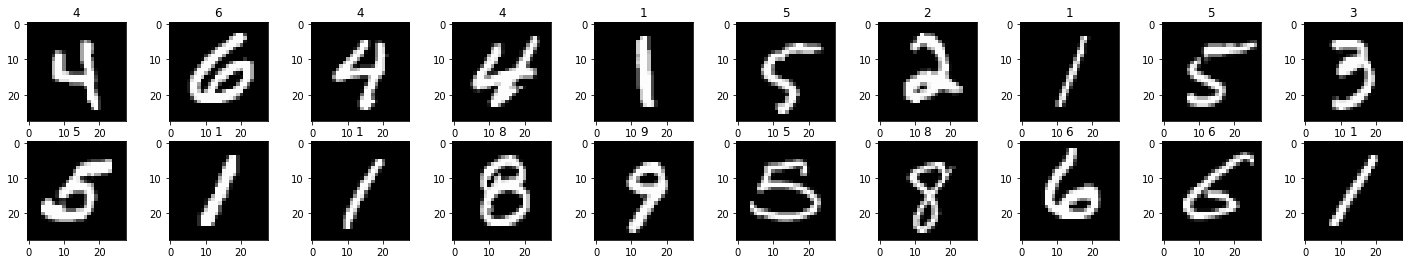

In [6]:
dataiter = iter(training_loader) 
images, labels = dataiter.next()
fig = plt.figure(figsize = (25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2 , 10, idx + 1)
  plt.imshow(im_convert(images[idx]))
  ax.set_title(labels[idx].item())



In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2 , D_out)
  def forward(self , x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x



In [8]:
model = Classifier(784,125,65,10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [10]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs ,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels.data)
    running_loss += loss.item()
  else:
    with torch.no_grad():
      for val_inputs , val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs ,val_labels)
        _,val_preds = torch.max(val_outputs, 1)
        val_running_corrects += torch.sum(val_preds == val_labels.data)
        val_running_loss += val_loss.item()

    epoch_loss = running_loss / len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss / len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('Epoch :', (e+1))
    print('Training loss: {:.4f}, acc: {:.4f}'.format(epoch_loss,epoch_acc.item()))
    print('Validation loss: {:.4f}, Validation acc: {:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))



Epoch : 1
Training loss: 0.9406, acc: 76.1517
Validation loss: 0.4245, Validation acc: 88.3000
Epoch : 2
Training loss: 0.3756, acc: 89.4767
Validation loss: 0.3186, Validation acc: 90.7700
Epoch : 3
Training loss: 0.3098, acc: 91.0433
Validation loss: 0.2785, Validation acc: 92.1000
Epoch : 4
Training loss: 0.2735, acc: 92.1033
Validation loss: 0.2514, Validation acc: 92.4600
Epoch : 5
Training loss: 0.2484, acc: 92.7267
Validation loss: 0.2289, Validation acc: 93.3700
Epoch : 6
Training loss: 0.2261, acc: 93.3783
Validation loss: 0.2091, Validation acc: 93.8200
Epoch : 7
Training loss: 0.2076, acc: 93.8917
Validation loss: 0.1962, Validation acc: 94.2700
Epoch : 8
Training loss: 0.1911, acc: 94.4267
Validation loss: 0.1804, Validation acc: 94.5700
Epoch : 9
Training loss: 0.1777, acc: 94.7800
Validation loss: 0.1745, Validation acc: 94.8700
Epoch : 10
Training loss: 0.1653, acc: 95.2067
Validation loss: 0.1644, Validation acc: 94.9700
Epoch : 11
Training loss: 0.1550, acc: 95.4933
Va

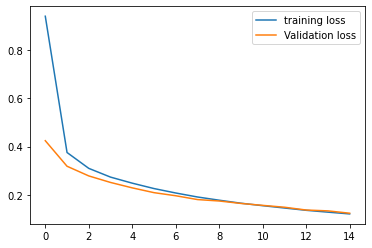

In [11]:
plt.plot(running_loss_history, label= "training loss")
plt.plot(val_running_loss_history, label= "Validation loss")
plt.legend()

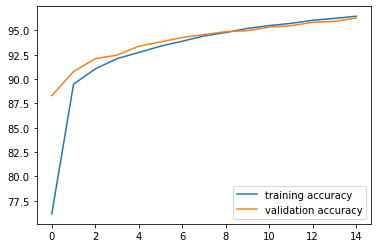

In [12]:
plt.plot(running_corrects_history, label= "training accuracy")
plt.plot(val_running_corrects_history, label= "validation accuracy")
plt.legend()

In [13]:
!pip install pillow==4.0.0

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: torchvision 0.6.0+cu101 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 4.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


<Response [200]>


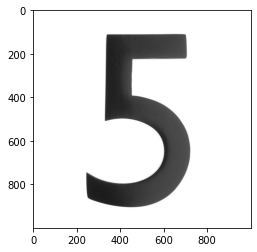

In [14]:
import requests
from PIL import Image
import PIL.ImageOps
url = "https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg"
response = requests.get(url , stream = True)
img = Image.open(response.raw)
plt.imshow(img)
print(response)

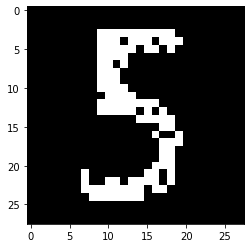

In [15]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))



In [17]:
img = img.view(img.shape[0], -1)
output = model(img)
_,pred = torch.max(output ,1)

print(pred.item())


5
